###  Data Analytics III 
1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset. 
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

In [1]:
# Installing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB #gaussiannb used for continous data, bernoullis for binary data, multinomial for district/distinct data
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, classification_report

In [2]:
# Load the dataset
df = pd.read_csv("Iris.csv")

In [3]:
# Print first 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Shape
df.shape

(150, 6)

In [5]:
# Summary Statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Find null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# Splitting the dataset
x = df.drop(["Species"],axis=1)
y = df["Species"]
print("x.shape: ", x.shape)
print("y.shape: ", y.shape)

x.shape:  (150, 5)
y.shape:  (150,)


In [8]:
# Split the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [9]:
# Training the model
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [10]:
# Prediction
y_predict = model.predict(x_test)
y_predict

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor'], dtype='<U15')

In [11]:
# Model Score
model.score(x_test, y_test)

1.0

In [12]:
# Accuracy 
a = accuracy_score(y_test, y_predict)
a

1.0

In [13]:
# COnfusion matrix
cm = confusion_matrix(y_test, y_predict)
print("confusion matrix: \n", cm)

confusion matrix: 
 [[12  0  0]
 [ 0  9  0]
 [ 0  0  9]]


In [14]:
# Classification Report
cr = classification_report(y_test, y_predict)
cr

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        12\nIris-versicolor       1.00      1.00      1.00         9\n Iris-virginica       1.00      1.00      1.00         9\n\n       accuracy                           1.00        30\n      macro avg       1.00      1.00      1.00        30\n   weighted avg       1.00      1.00      1.00        30\n'

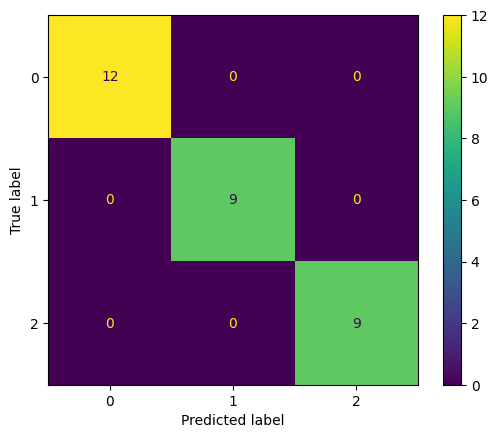

In [16]:
# Confusion Matrix Display
cmdisplay = ConfusionMatrixDisplay(confusion_matrix = cm)
cmdisplay.plot()
plt.show()